<a href="https://colab.research.google.com/github/kalai2315/Clustering/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/Live.csv', encoding='latin1')

In [4]:
df.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(7050, 16)

In [5]:
df.isnull().sum()

,0
ï»¿status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


1.How many columns contain null data?

  4 columns

2) How many status ids are unique?

In [7]:
df["ï»¿status_id"].nunique()

6997

3) How many video post has been made for live selling:

In [8]:
df["status_type"].value_counts()  # 2334

,count
status_type,
photo,4288
video,2334
status,365
link,63


4) How many likes have been given to the photo posted on 4/19/2018 at 22:26?

In [10]:
df.loc[(df["status_published"] == "4/19/2018 22:26") & (df["status_type"] == "photo"), "num_likes"].sum()

379

5) How many total shares were made for the video post that was posted on 7/15/2017 at 10:52?

In [11]:
df.loc[(df["status_published"] == "7/15/2017 10:52") & (df["status_type"] == "video"), "num_shares"].sum()

167

6) What output will the below code give?

In [ ]:
colour=['red','blue','green','yellow','cyan']

n=0
for i in range(0,len(colour)):

  plt.scatter(X[df['Clusters(5)']==i],Y[df['Clusters(5)']==i],s=10,c=colour[i])

  plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')

  plt.show()  # gives 5 clusters with midpoint (black colour)

Perform the following operations on the dataset:

 ● Drop Status id and status published column.

● Use a label encoder to encode the status type column.

● Standardize the data using min-max scalar

 ● Create a K means model for 2 clusters.

 From the above model, what is the inter-cluster variance of the model?

In [14]:
df.drop(["ï»¿status_id", "status_published"], axis=1, inplace=True)

In [15]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [16]:
df["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["status_type"] = le.fit_transform(df["status_type"])

In [18]:
df["status_type"].unique()

array([3, 1, 0, 2])

In [19]:
df.drop(["Column1","Column2","Column3","Column4"], axis=1, inplace=True)

In [20]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
df_scaled

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [23]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [25]:
df1 =pd.DataFrame(df_scaled, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'])

In [26]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# **Build KMeans Model**

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(df1)


KMeans(n_clusters=2, random_state=42)

**Inter-cluster variance **

In [30]:
#inertia represents the inter cluster variance

inter_cluster_variance = kmeans.inertia_
print(inter_cluster_variance)

237.7572640441955


In [31]:
clusters = list(range(2,8))
ssd = []

for num_clusters in clusters:
  model_clus = KMeans(n_clusters = num_clusters,max_iter=150,random_state=50)
  model_clus.fit(df1)
  ssd.append(model_clus.inertia_)

In [33]:
ssd   #sum of Squared distance

[237.7572640441955,
 161.5963340003365,
 127.31215896781949,
 96.24989550305224,
 82.47515136223939,
 73.25958198497601]

Text(0, 0.5, 'Sum of Squared Distance')

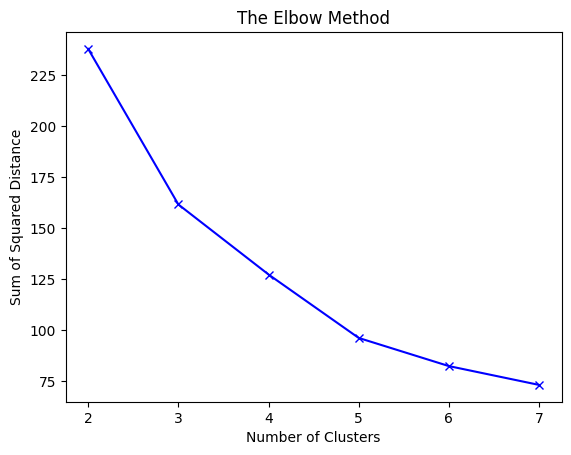

In [32]:
plt.plot(clusters,ssd,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')

**The elbow appears around 3 clusters. This suggests that 3 clusters might be the optimal number for the K-Means clustering model. Beyond this point, adding more clusters doesn't significantly improve the clustering.**

In [35]:
kmodel = KMeans(n_clusters = 3,max_iter=150,random_state=50)
kmodel.fit(df1)


KMeans(max_iter=150, n_clusters=3, random_state=50)

In [36]:
kmodel.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
df["Cluster_Id"] = kmodel.labels_

In [38]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


In [39]:
df[df["Cluster_Id"]==0]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
0,3,529,512,262,432,92,3,1,1,0,0
2,3,227,236,57,204,21,1,1,0,0,0
6,3,503,614,72,418,70,10,2,0,3,0
7,3,295,453,53,260,32,1,1,0,1,0
15,3,332,100,30,303,23,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6991,2,6,0,1,6,0,0,0,0,0,0
6992,3,36,240,20,33,2,1,0,0,0,0
7015,2,63,0,1,62,1,0,0,0,0,0
7016,2,5,0,0,5,0,0,0,0,0,0


In [40]:
df[df["Cluster_Id"]==1]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
1,1,150,0,0,150,0,0,0,0,0,1
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
5,1,217,6,0,211,5,1,0,0,0,1
8,1,203,1,0,198,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


In [41]:
df[df["Cluster_Id"] == 2]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
166,1,4410,633,257,4315,73,17,5,0,0,2
355,1,1186,37,1,1161,19,6,0,0,0,2
361,2,1043,117,24,984,58,1,0,0,0,2
726,1,1542,18,1260,1520,12,6,0,4,0,2
1010,2,1052,12,7,1052,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
6256,1,1244,218,9,1226,5,12,1,0,0,2
6261,1,2420,75,17,2392,20,8,0,0,0,2
6266,1,1168,104,49,1133,17,17,1,0,0,2
6270,1,1985,39,21,1961,11,12,0,1,0,2


In [42]:
df.Cluster_Id.value_counts(ascending=True)

,count
Cluster_Id,
2,327
0,2584
1,4139


In [43]:
import plotly.express as px

In [45]:
fig=px.scatter(df,x='num_likes',y='num_shares',color='Cluster_Id')
fig.show()


In [46]:
fig=px.scatter(df,x='num_reactions',y='num_shares',color='Cluster_Id')
fig.show()

Insight:

The clusters are distinct based on the num_reactions and num_shares. Cluster 0 seems to be associated with content that has a moderate number of reactions and a varying number of shares. Cluster 2 is likely associated with content that has a higher number of reactions but lower shares, indicating a possible difference in how the content is being engaged with across these clusters.

This scatter plot helps in understanding the distribution and relationship between num_reactions and num_shares across different clusters.

In [47]:
fig=px.scatter(df,x='num_reactions',y='num_likes',color='Cluster_Id')
fig.show()

**Insight:**

The linear trend observed suggests a **strong correlation** between num_reactions and num_likes across the data, with **Cluster 2** representing posts with higher engagement in terms of both reactions and likes.

This chart effectively highlights the relationship between reactions and likes, showing that as one increases, so does the other, with distinct clusters showing variations in the intensity of this engagement.